In [2]:
#import packages
import pandas as pd 
import numpy as np 

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes

from PIL import Image
import requests
from io import BytesIO


from highlight_text import HighlightText, ax_text, fig_text
from datetime import date, datetime

In [38]:
#Import data 
df = pd.read_csv("/Users/maxtixador/Downloads/EH_std_sk_stats_all_regular_no_adj_2021-12-28 (1).csv")
df.columns = [i.replace('/', '_') for i in df.columns]
df.head()

,Player,Season,Team,Position,GP,TOI,G_60,A1_60,A2_60,Points_60,...,iHF_60,iHA_60,iPENT2_60,iPEND2_60,iPENT5_60,iPEND5_60,iPEN±_60,FOW_60,FOL_60,FO±_60
0,Aaron Ekblad,21-22,FLA,D,28,714.97,0.67,0.59,0.76,2.01,...,2.27,2.10,0.59,0.50,0.0,0.0,-0.08,0.0,0.0,0.0
1,Adam Boqvist,21-22,CBJ,D,18,287.68,1.25,0.21,0.42,1.88,...,1.25,3.75,0.21,1.04,0.0,0.0,0.83,0.0,0.0,0.0
2,Adam Fox,21-22,NYR,D,30,739.57,0.41,0.97,1.14,2.51,...,0.97,3.49,0.57,0.57,0.0,0.0,0.00,0.0,0.0,0.0
3,Adam Larsson,21-22,SEA,D,30,662.60,0.18,0.27,0.27,0.72,...,7.06,2.81,1.00,0.36,0.0,0.0,-0.63,0.0,0.0,0.0
4,Adam Pelech,21-22,NYI,D,22,477.45,0.00,0.13,0.38,0.50,...,5.28,5.03,0.25,0.13,0.0,0.0,-0.13,0.0,0.0,0.0


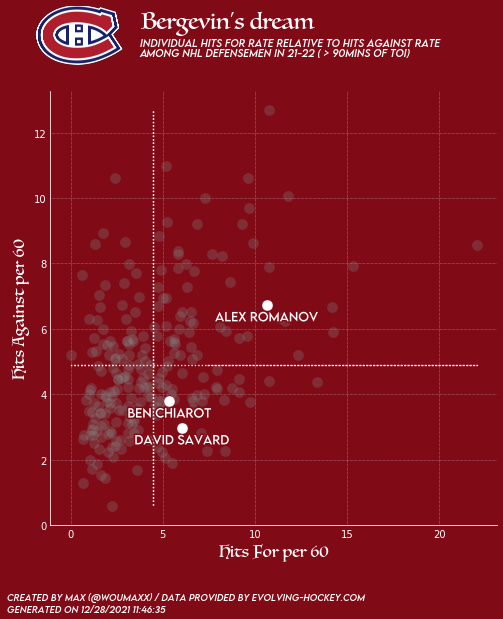

In [74]:
player = "Alex Romanov"
player1 = "Ben Chiarot"
player2 = "David Savard"

title_font = "Luminari"
body_font = "LEMON MILK"
text_color = "w"
background = "#800a16"
filler = "grey"
primary = "red"


mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10


fig, ax = plt.subplots(figsize=(8,8))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

ax.grid(ls="dotted",lw="0.5",color="lightgrey", zorder=1)



x = df.iHF_60.tolist()
y = df.iHA_60.tolist()

x_mean = [np.mean(x)]*len(y)
y_mean = [np.mean(y)]*len(x)

x_mean_line = ax.plot(x_mean,y, label='Mean', linestyle=':', color = 'w', linewidth = 1.3)
y_mean_line = ax.plot(x,y_mean, label='Mean', linestyle=':', color = 'w', linewidth = 1.3)

ax.scatter(x,y,s=120,color=filler,edgecolors=background, alpha=0.3, lw=0.5, zorder=2)



x = df.loc[df['Player'] == player, 'iHF_60']
y = df.loc[df['Player'] == player, 'iHA_60']
t = player

x1 = df.loc[df['Player'] == player1, 'iHF_60']
y1 = df.loc[df['Player'] == player1, 'iHA_60']
t1 = player1

x2 = df.loc[df['Player'] == player2, 'iHF_60']
y2 = df.loc[df['Player'] == player2, 'iHA_60']
t2 = player2

ax.plot(x,y, zorder=3, color=text_color)

ax.scatter(x,y,s=120,color="w",edgecolors=background, alpha=1, lw=.25, zorder=4)
t = ax.text(x,y-0.5,t,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

ax.scatter(x1,y1,s=120,color="w",edgecolors=background, alpha=1, lw=.25, zorder=4)
t1 = ax.text(x1,y1-0.5,t1,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t1.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

ax.scatter(x2,y2,s=120,color="w",edgecolors=background, alpha=1, lw=.25, zorder=4)
t2 = ax.text(x2,y2-0.5,t2,color=text_color,fontsize=12, ha="center", fontfamily=body_font)
t2.set_path_effects([path_effects.withStroke(linewidth=3,foreground=background)])

fig.text(0.28,0.94, "Bergevin's dream\n", fontweight="bold",fontsize=22, fontfamily=title_font,color=text_color)

fig.text(0.28,.94,"Individual Hits For rate relative to Hits Against rate\namong NHL Defensemen in 21-22 ( > 90mins of TOI)",fontweight="regular", style ="italic", fontsize=10,fontfamily=body_font, color=text_color)

ax.set_xlabel("Hits For per 60", fontfamily=title_font, fontweight="bold", fontsize=16, color=text_color)
ax.set_ylabel("Hits Against per 60", fontfamily=title_font, fontweight="bold", fontsize= 16, color=text_color)

ax.tick_params(axis="both",length=0)


spines = ["top","right","bottom","left"]
for s in spines:
    if s in ["top","right"]:
        ax.spines[s].set_visible(False)
    else:
        ax.spines[s].set_color(text_color)




ax2 = fig.add_axes([0.1,0.90,0.15,0.15]) # badge
ax2.axis("off")
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Montreal_Canadiens.svg/2560px-Montreal_Canadiens.svg.png"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
ax2.imshow(img)

today = date.today()
now = datetime.now()
time = now.strftime("%m/%d/%Y %H:%M:%S")

fig.text(0.05, -0.025, f"Created by Max (@woumaxx) / Data provided by evolving-hockey.com\nGenerated on {time}",
        fontstyle="italic",fontsize=9, fontfamily=body_font, color=text_color)


#ax.set_ylim(12,0)


plt.savefig('Hits.png', bbox_inches = "tight", dpi = 500)
plt.show()


In [172]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [43]:
print(df.loc[df['Player'] == player, 'iHF_60'])

10    10.64
Name: iHF_60, dtype: float64


In [1]:
import matplotlib.font_manager
flist = matplotlib.font_manager.get_fontconfig_fonts()
names = [matplotlib.font_manager.FontProperties(fname=fname).get_name() for fname in flist]
print (names)

[]


In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))